# Data Loading

In [314]:
# Import the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [315]:
# To handle future warnings
from warnings import simplefilter

# ignore all future warnings
simplefilter(action='ignore', category = FutureWarning)

In [316]:
# Load data and handle missing values

miss_values = ['?']
adult = pd.read_csv('adult.csv',na_values = miss_values)
print(adult.shape)
adult.head(3)

(48842, 15)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K


# Data Preparation

We've observed that 'fnlwgt' and 'educationl-num' columns can be dropped.

In [317]:
# Removing unnecessary columns

useless = ['fnlwgt','educational-num'] 
adult = adult.drop(useless,axis=1)

print(adult.shape)
adult.head(3)

(48842, 13)


,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K


In [318]:
# Defining numerical and categorical columns

num_col = list(adult.describe().columns)
cat_col = list(adult.describe(include = np.object).columns)

In [319]:
# Encoding of categrical variable variables

adult = pd.get_dummies(adult,columns=cat_col,drop_first=True)

print(adult.shape)
adult.head(3)

(48842, 96)


,age,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,25,0,0,40,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,38,0,0,50,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,28,0,0,40,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [320]:
# Train Test Split

from sklearn.model_selection import train_test_split as tts
train,test = tts(adult,test_size=0.30,random_state=0)

train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

print(train.shape)
print(test.shape)
print(type(train))
train.head(3)

(34189, 96)
(14653, 96)
<class 'pandas.core.frame.DataFrame'>


,age,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,27,0,0,40,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,42,0,0,43,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,32,7298,0,70,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1


Standarization to be performed on 'train' data only using 'fit_transform' using 'scaler' object.

In [321]:
# Standardization on train data

from sklearn.preprocessing import StandardScaler as std
scaler = std()
std_train = scaler.fit_transform(train.loc[:,num_col])

_train = pd.DataFrame(std_train,columns=num_col)
print(_train.shape)
_train.head(3)

(34189, 4)


,age,capital-gain,capital-loss,hours-per-week
0,-0.849978,-0.144199,-0.216492,-0.034027
1,0.241031,-0.144199,-0.216492,0.207331
2,-0.486308,0.850561,-0.216492,2.379553


'_train' dataframe contains standarized values of all numerical columns.
These values are replaced with their respective columns in 'train' dataframe.

In [322]:
train.loc[:,num_col] = _train.loc[:,num_col]
print(train.shape)
train.head(3)

(34189, 96)


,age,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,-0.849978,-0.144199,-0.216492,-0.034027,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.241031,-0.144199,-0.216492,0.207331,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,-0.486308,0.850561,-0.216492,2.379553,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [323]:
# Considering income as target variable, splitting into input(data) and target variables.

y_train = train['income_>50K']
x_train = train.drop('income_>50K',axis=1)

##y_train=pd.DataFrame(y_train)

print(type(x_train))
print(type(y_train))
print(x_train.shape)
print(y_train.shape)
print(train.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(34189, 95)
(34189,)
(34189, 96)


# Training LogisticRegression Model

In [324]:
# Training model

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(x_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Using 'scaler' object(which was used to fit_transform train data),test data is 'transformed'.  Transformed test data is stored in '_test' dataframe.

In [325]:
# transforming test data

std_test = scaler.transform(test.loc[:,num_col])

_test = pd.DataFrame(std_test,columns=num_col)
_test.head()

,age,capital-gain,capital-loss,hours-per-week
0,-0.195373,-0.144199,-0.216492,-0.034027
1,1.332040,-0.144199,-0.216492,-0.355838
2,0.750169,0.508297,-0.216492,0.368236
3,1.113838,-0.144199,-0.216492,1.172763
4,-1.577317,-0.144199,-0.216492,-1.321269


In [326]:
test.loc[:,num_col] = _test.loc[:,num_col]
print(test.shape)
test.head()


(14653, 96)


,age,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,-0.195373,-0.144199,-0.216492,-0.034027,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1.332040,-0.144199,-0.216492,-0.355838,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0.750169,0.508297,-0.216492,0.368236,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,1.113838,-0.144199,-0.216492,1.172763,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,-1.577317,-0.144199,-0.216492,-1.321269,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [327]:
print(train.shape)
print(test.shape)


(34189, 96)
(14653, 96)


In [328]:
# Considering income as target varible, splitting test data into input and target variables.

y_test = test['income_>50K']
x_test = test.drop('income_>50K',axis=1)


# Predictions

In [329]:
# Making predictions

y_pred = classifier.predict(x_test)

In [330]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
temp_df.tail()

,Actual,Predicted
14648,1,0
14649,0,0
14650,0,0
14651,0,0
14652,0,0


In [331]:
# calculate accuracy of class predictions

from sklearn import metrics

acc = metrics.accuracy_score(y_test, y_pred)
prec = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

print("metric accuracy: ",acc,"\nprecision:",prec,"\nrecall score:",recall)

metric accuracy:  0.8508837780659251 
precision: 0.7320307048150733 
recall score: 0.5968705547652916


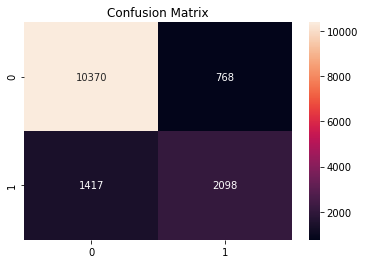

In [332]:
# Confusion metrics thorough heatmap

con_metrics = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(con_metrics, annot=True,fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [333]:
# Giving matrix classification report
# using 96 features
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90     11138
           1       0.73      0.60      0.66      3515

    accuracy                           0.85     14653
   macro avg       0.81      0.76      0.78     14653
weighted avg       0.84      0.85      0.85     14653



# Recursive Feature Elemination(RFE)

In [334]:
from sklearn.feature_selection import RFE

# Create obj of RFE.
# Pass the algorithm and number of features=13

rfe = RFE(classifier,13)
rfe = rfe.fit(x_train,y_train)
temp_df = pd.DataFrame({'columns':x_train.columns,'included': rfe.support_,'ranking':rfe.ranking_})
temp_df

,columns,included,ranking
0,age,False,49
1,capital-gain,True,1
2,capital-loss,False,55
3,hours-per-week,False,47
4,workclass_Local-gov,False,62
...,...,...,...
90,native-country_Thailand,False,14
91,native-country_Trinadad&Tobago,True,1
92,native-country_United-States,False,60
93,native-country_Vietnam,False,24


In [335]:
# Getting best 13 columns

imp_col = x_train.columns[rfe.support_]
imp_col

Index(['capital-gain', 'education_Bachelors', 'education_Doctorate',
       'education_Masters', 'education_Prof-school',
       'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse',
       'occupation_Priv-house-serv', 'relationship_Own-child',
       'native-country_Columbia', 'native-country_Dominican-Republic',
       'native-country_Mexico', 'native-country_Trinadad&Tobago'],
      dtype='object')

In [336]:
# Creating new training dataframe with 13 most important columns(using RFE)

x_train_new = x_train[imp_col]
x_train_new.shape

(34189, 13)

In [337]:
# Training logisticRegression model with new training data with 13 columns

new_classifier = LogisticRegression()
new_classifier.fit(x_train_new, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [338]:
# Making predictions for new test data(again having 13 columns)

X_test_new = x_test[imp_col]

y_test_pred_new = new_classifier.predict(X_test_new)


dataf=pd.DataFrame({'actual':y_test,'pred':y_test_pred_new})
dataf

,actual,pred
0,0,0
1,1,1
2,1,1
3,0,0
4,0,0
...,...,...
14648,1,0
14649,0,0
14650,0,0
14651,0,0


In [339]:
# Calculate accuracy of new model.

acc = metrics.accuracy_score(y_test, y_test_pred_new)
prec = metrics.precision_score(y_test, y_test_pred_new)
recall = metrics.recall_score(y_test, y_test_pred_new)

print("metric accuracy: ",acc,"\nprecision:",prec,"\nrecall score:",recall)

metric accuracy:  0.8356650515252849 
precision: 0.7195557318524395 
recall score: 0.5160739687055477


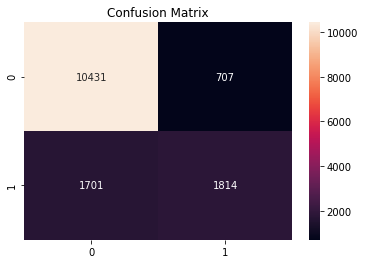

In [366]:
# Confusion metrics thorough heatmap

rfe_con_metrics = metrics.confusion_matrix(y_test, y_test_pred_new)
sns.heatmap(rfe_con_metrics, annot=True,fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [340]:
# Giving matrix classification report
# Using 13 features only(RFE)

print(metrics.classification_report(y_test, y_test_pred_new))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90     11138
           1       0.72      0.52      0.60      3515

    accuracy                           0.84     14653
   macro avg       0.79      0.73      0.75     14653
weighted avg       0.83      0.84      0.83     14653



## Observation:

#### While using 96 features:
- accuracy was 0.85
- precision was 0.73

#### While using 13 features only(through RFE):
- accuracy was 0.84
- precision was 0.72

## Dimensionality Reduction: Principal Component Analysis(PCA)


In [341]:
# initializing the PCA

from sklearn.decomposition import PCA
pca = PCA()

In [342]:
# Standardizing the whole adult DataFrame

stnrd = std()
_adult = stnrd.fit_transform(adult.loc[:,num_col])

std_adult = pd.DataFrame(_adult,columns=num_col)

adult[num_col] = std_adult[num_col]

adult.head(3)

,age,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,-0.995129,-0.144804,-0.217127,-0.034087,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,-0.046942,-0.144804,-0.217127,0.772930,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,-0.776316,-0.144804,-0.217127,-0.034087,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [343]:
pca.fit(adult)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [344]:
# covariance matrix, shape(96,96)
pca.components_

array([[ 6.18845724e-01,  3.31178972e-01,  2.30320330e-01, ...,
        -5.32601354e-04,  4.88241900e-05,  1.77074106e-01],
       [-7.40166641e-02,  6.47707694e-01, -7.56270427e-01, ...,
        -2.65087676e-05,  6.03783427e-05,  7.44193918e-03],
       [-6.52454502e-01,  2.00606940e-01,  2.75615415e-01, ...,
         1.22539951e-04, -8.60426791e-05,  3.22170771e-02],
       ...,
       [-3.50786105e-05,  1.91528807e-04,  3.73056518e-05, ...,
         1.18583247e-01,  2.38361559e-01,  2.46611203e-05],
       [ 3.50235597e-04, -7.55690178e-06,  2.12172845e-05, ...,
        -2.31880660e-04, -4.98648331e-04, -4.81484526e-05],
       [-1.41796818e-05, -8.40678904e-06, -1.13072821e-04, ...,
         1.06541884e-03,  1.23978420e-03,  2.67716863e-05]])

In [345]:
arr=pca.explained_variance_ratio_

print(arr,'\n',arr.shape)

[1.77665111e-01 1.32047492e-01 1.23257531e-01 1.14872162e-01
 5.27999941e-02 3.90049584e-02 2.99233529e-02 2.91099766e-02
 2.71982839e-02 2.35997007e-02 2.00179829e-02 1.70085972e-02
 1.59100326e-02 1.48272332e-02 1.38896369e-02 1.27039790e-02
 1.24395910e-02 1.12309856e-02 1.05800158e-02 8.89043360e-03
 8.46469925e-03 8.07939015e-03 6.86986935e-03 6.41861404e-03
 5.70053982e-03 5.43639748e-03 5.09449828e-03 4.73709482e-03
 4.49154217e-03 4.41678517e-03 4.31883916e-03 4.04548048e-03
 3.80066574e-03 3.60525986e-03 3.41008602e-03 2.80002360e-03
 2.61298119e-03 2.46540960e-03 2.24838342e-03 2.01106017e-03
 1.94116166e-03 1.89022438e-03 1.79433635e-03 1.47381718e-03
 1.40186601e-03 1.37487837e-03 1.12911286e-03 8.51362224e-04
 6.69194926e-04 6.49191272e-04 5.57092673e-04 5.23651814e-04
 4.74571776e-04 4.39988354e-04 3.84596601e-04 3.74739655e-04
 3.48290668e-04 3.17498213e-04 3.09667390e-04 2.80996994e-04
 2.78607360e-04 2.71396152e-04 2.66376990e-04 2.59054155e-04
 2.50415099e-04 2.349320

In [346]:
csum=np.cumsum(arr)
print(csum.shape)
csum

(96,)


array([0.17766511, 0.3097126 , 0.43297013, 0.5478423 , 0.60064229,
       0.63964725, 0.6695706 , 0.69868058, 0.72587886, 0.74947856,
       0.76949655, 0.78650514, 0.80241518, 0.81724241, 0.83113205,
       0.84383603, 0.85627562, 0.8675066 , 0.87808662, 0.88697705,
       0.89544175, 0.90352114, 0.91039101, 0.91680962, 0.92251016,
       0.92794656, 0.93304106, 0.93777815, 0.9422697 , 0.94668648,
       0.95100532, 0.9550508 , 0.95885147, 0.96245673, 0.96586681,
       0.96866684, 0.97127982, 0.97374523, 0.97599361, 0.97800467,
       0.97994583, 0.98183606, 0.98363039, 0.98510421, 0.98650608,
       0.98788095, 0.98901007, 0.98986143, 0.99053062, 0.99117982,
       0.99173691, 0.99226056, 0.99273513, 0.99317512, 0.99355972,
       0.99393446, 0.99428275, 0.99460025, 0.99490991, 0.99519091,
       0.99546952, 0.99574091, 0.99600729, 0.99626634, 0.99651676,
       0.99675169, 0.99697806, 0.99720247, 0.99741305, 0.99761608,
       0.99781005, 0.99799243, 0.99816185, 0.99832282, 0.99847

#### Observation: above 90% of data can be explained by using only 5 attributes, instead of using 96 attributes.

In [347]:
# configuring the parameteres
# number of components = 5

pca_new = PCA(n_components = 5)
pca_data = pca_new.fit_transform(adult)

print(pca_data.shape,type(pca_data))


(48842, 5) <class 'numpy.ndarray'>


In [348]:
# Creating a new dataframe with 5 input variables(obtained using PCA) and 1 target variable.

pca_df = pd.DataFrame(pca_data)

pca_df['income_>50K'] = adult['income_>50K']

print(pca_df.shape)
pca_df.head(3)


(48842, 6)


,0,1,2,3,4,income_>50K
0,-1.226387,0.183074,0.711013,-0.014153,0.036909,0
1,0.479639,0.076120,0.382122,-0.750768,-0.471278,0
2,-0.106614,0.099049,0.309380,-0.190551,-1.074867,1


In [349]:
# Train Test Split

_target = pca_df['income_>50K']
_data = pca_df.drop('income_>50K',axis=1)

_xtrain,_xtest,_ytrain,_ytest = tts(_data,_target,test_size=0.30,random_state=0)

#train = train.reset_index(drop=True)
#test = test.reset_index(drop=True)

#print(train.shape)
#print(test.shape)
#print(type(train))
#train.head()

### LogisticRegression 

In [350]:
# LogisticRegression on Reducted DataFrame

pca_classifier = LogisticRegression()
pca_classifier.fit(_xtrain, _ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [351]:
# Prediction on reducted model

_ytest_pred = pca_classifier.predict(_xtest)

dataframe = pd.DataFrame({'actual':_ytest,'pred':_ytest_pred})
dataframe.head()

,actual,pred
38113,0,0
39214,1,1
44248,1,1
10283,0,0
26724,0,0


In [352]:
# Calculating accuracy of reducted logistic regression with 6 attributes(using PCA)

_acc = metrics.accuracy_score(_ytest, _ytest_pred)
_prec = metrics.precision_score(_ytest, _ytest_pred)
_recall = metrics.recall_score(_ytest, _ytest_pred)

print("metric accuracy: ",_acc,"\nprecision:",_prec,"\nrecall score:",_recall)

metric accuracy:  0.9206988330034805 
precision: 0.8757585435962951 
recall score: 0.7800853485064011


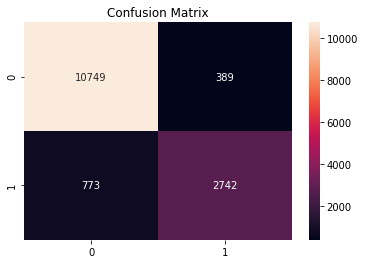

In [367]:
# Confusion metrics thorough heatmap

pca_con_metrics = metrics.confusion_matrix(_ytest, _ytest_pred)
sns.heatmap(pca_con_metrics, annot=True,fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [353]:
# Giving matrix classification report[logistic Regression]
# Using 6 features only(PCA)

print(metrics.classification_report(_ytest, _ytest_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     11138
           1       0.88      0.78      0.83      3515

    accuracy                           0.92     14653
   macro avg       0.90      0.87      0.89     14653
weighted avg       0.92      0.92      0.92     14653



### Observation: [LogisticRegression]

#### While using 96 features:
- accuracy was 0.85
- precision was 0.73
#### While using 13 features only(through RFE):
- accuracy was 0.84
- precision was 0.72
#### Whlie using only 6 features(through PCA):
- accuracy is 0.92
- precision is 0.88

Since task is Classification, we can also use K-NearestNeighbours, DecisionTree, SupportVectorMachine.

### K-NearestNeighbour

In [354]:
# Using KNN algorithm 

from sklearn.neighbors import KNeighborsClassifier as KNN

knn_classifier = KNN()

#give training data to the model using fit function of KNeighborsClassifier class using classifier object 
knn_classifier.fit(_xtrain,_ytrain)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [355]:
# KNN prediction on test data

knn_ypred = knn_classifier.predict(_xtest)

In [356]:
# Calculating accuracy of KNN model with 6 attributes(using PCA)

k_acc = metrics.accuracy_score(_ytest,knn_ypred)
k_prec = metrics.precision_score(_ytest,knn_ypred)
k_recall = metrics.recall_score(_ytest,knn_ypred)

print("metric accuracy: ",k_acc,"\nprecision:",k_prec,"\nrecall score:",k_recall)


metric accuracy:  0.9682658841192929 
precision: 0.9683660933660934 
recall score: 0.8970128022759601


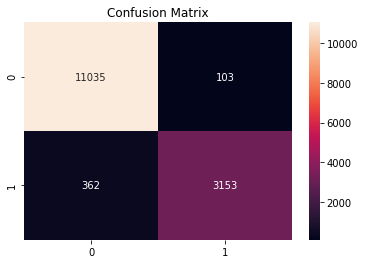

In [368]:
# Confusion metrics thorough heatmap

k_con_metrics = metrics.confusion_matrix(_ytest, knn_ypred)
sns.heatmap(k_con_metrics, annot=True,fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [357]:
# Giving matrix classification report,[KNN]
# Using 6 features only(PCA)

print(metrics.classification_report(_ytest,knn_ypred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11138
           1       0.97      0.90      0.93      3515

    accuracy                           0.97     14653
   macro avg       0.97      0.94      0.96     14653
weighted avg       0.97      0.97      0.97     14653



### Decision Trees

In [358]:
# Using Decision Trees

from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()

dt_classifier.fit(_xtrain, _ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [359]:
# Prediction on test data

dt_ypred = dt_classifier.predict(_xtest)

In [360]:
# Calculating accuracy of DecisionTree model with 6 attributes(using PCA)

dt_acc = metrics.accuracy_score(_ytest,dt_ypred)
dt_prec = metrics.precision_score(_ytest,dt_ypred)
dt_recall = metrics.recall_score(_ytest,dt_ypred)

print("metric accuracy: ",dt_acc,"\nprecision:",dt_prec,"\nrecall score:",dt_recall)

metric accuracy:  0.9600081894492596 
precision: 0.9171176303047565 
recall score: 0.9160739687055477


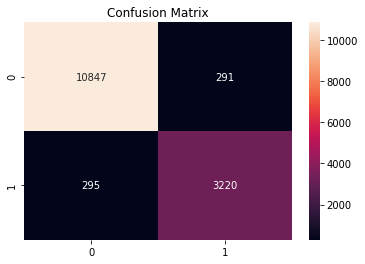

In [369]:
# Confusion metrics thorough heatmap

dt_con_metrics = metrics.confusion_matrix(_ytest, dt_ypred)
sns.heatmap(dt_con_metrics, annot=True,fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [361]:
# Giving matrix classification report,[DecisionTree]
# Using 6 features only(PCA)

print(metrics.classification_report(_ytest,dt_ypred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     11138
           1       0.92      0.92      0.92      3515

    accuracy                           0.96     14653
   macro avg       0.95      0.94      0.95     14653
weighted avg       0.96      0.96      0.96     14653



### Support Vector Machine

In [362]:
# Using Support Vector Machine

from sklearn.svm import SVC
svm_classifier = SVC()

svm_classifier.fit(_xtrain, _ytrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [363]:
# Predictions on SVM Model

svm_ypred = svm_classifier.predict(_xtest)

In [364]:
# Calculating accuracy of DecisionTree model with 6 attributes(using PCA)

svm_acc = metrics.accuracy_score(_ytest, svm_ypred)
svm_prec = metrics.precision_score(_ytest, svm_ypred)
svm_recall = metrics.recall_score(_ytest, svm_ypred)

print("metric accuracy: ",svm_acc,"\nprecision:",svm_prec,"\nrecall score:",svm_recall)

metric accuracy:  0.9575513546713984 
precision: 0.9664624314737181 
recall score: 0.8526315789473684


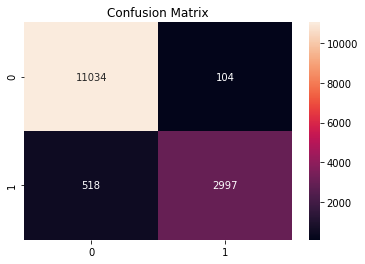

In [370]:
# Confusion metrics thorough heatmap

svm_con_metrics = metrics.confusion_matrix(_ytest, svm_ypred)
sns.heatmap(svm_con_metrics, annot=True,fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [365]:
# Giving matrix classification report,[SVM]
# Using 6 features only(PCA)

print(metrics.classification_report(_ytest,svm_ypred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     11138
           1       0.97      0.85      0.91      3515

    accuracy                           0.96     14653
   macro avg       0.96      0.92      0.94     14653
weighted avg       0.96      0.96      0.96     14653



### Observation: [ LogisticReg , KNN , DecisionTree , SVM] (using 6 features)
#### LogicticRegression:
- accuracy is 0.92
- precision is 0.88
#### KNN:
- accuracy is 0.97  
- precision is 0.97
#### DecisionTree:
- accuracy is 0.96
- precision is 0.91
#### SVM:
- accuracy is 0.96
- precision is 0.97

## Conclusion: 
1. RFE should be preferred over Dimensionalilty Reduction.
2. Dimensionality reduction(PCA) gives higher accuracy in less dimensions.
3. KNN gives highest accuracy(0.97) with great precision(0.97) for the given data.